# Load Data

## From yfinance: Stock price data

In [4]:
load_t = '20220318'

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import pickle as pkl

# Load
df_5y = pkl.load(open('./data/df_5y_{}.pkl'.format(load_t), 'rb'))

## Attributes data

In [6]:
t = datetime.datetime.strptime(str(load_t), '%Y%m%d')
t_1 = datetime.datetime.strptime(str(load_t), '%Y%m%d') - datetime.timedelta(days=7)


try:
#     df_info_raw = pkl.load(open('df_info_raw.pkl', 'rb'))
    df_info_raw = pkl.load(open('./data/df_info_raw_{}.pkl'.format(datetime.datetime.strftime(t_1, '%Y%m%d')), 'rb'))
    print('df_info_raw loaded')
    
except:
    print('Uncomment and run below, takes about 1 hour!!!')
    
#     df_info_raw = pd.DataFrame({ticker: tick_obj.info for ticker, tick_obj in yf_tickers.tickers.items()})
#     pkl.dump(df_info_raw, open('df_info_raw.pkl', 'wb'))
#     pkl.dump(df_info_raw, open('df_info_raw_{}.pkl'.format(datetime.datetime.strftime(datetime.datetime.today(), '%Y%m%d')), 'wb'))

df_info_raw loaded


In [7]:
df_info_raw.shape

(158, 300)

# Data Cleaning and Processing - Stock Attributes

## Attributes selection

### Manual selection and categorize

In [8]:
# Construct dict of attributes to include
# fields = dict()

def fields_paste_to_list(paste):
    temp_fields= paste.split("\n")

    while '' in temp_fields: temp_fields.remove('')
    res = [f.strip().strip("'") for f in temp_fields]

    return res

# field_category = 'Sector industry'

# paste = """
# 'sector'
# 'industry'
# """

# fields[field_category] = fields_paste_to_list(paste)

In [9]:
# # Add an attribute to a category
def add_attribute_to_fields(fields, category, field):
    temp_list = fields[category]
    temp_list.append(field)
    fields[category] = temp_list
    return fields

In [10]:
## Remove an attribute from a category
def remove_attribute_from_fields(fields, category, field):
    temp_list = fields[category]
    temp_list.remove(field)
    fields[category] = temp_list
    return fields

In [11]:
# Save
# pkl.dump(fields, open('fields.pkl', 'wb'))

In [12]:
fields = pkl.load(open('fields.pkl', 'rb'))

In [13]:
list_fields = [f for k,v in fields.items() for f in v]
print('# of attributes:',len(list_fields))
print('# attributes no normalize:', len([f for k,v in fields.items() for f in v if 'to_norm' not in k]))
print('# to normalize:', len([f for k,v in fields.items() for f in v if 'to_norm' in k]))

# of attributes: 58
# attributes no normalize: 38
# to normalize: 20


In [14]:
# Filter to include only selected attributes
df_info = df_info_raw.loc[list_fields, :].T
df_info.head()

,targetMeanPrice,targetHighPrice,targetLowPrice,numberOfAnalystOpinions,fullTimeEmployees,marketCap,enterpriseValue,bookValue,currentPrice,52WeekChange,...,totalCash,totalDebt,currentRatio,debtToEquity,totalCashPerShare,quickRatio,city,country,sector,industry
600519.SS,2330.8,2685,1880,19,29031,2222230339584,2100624621568,138.791,1769.01,-0.121826,...,50701983744,529976352,4.432,0.293,40.361,1.181,Renhuai,China,Consumer Defensive,Beverages—Wineries & Distilleries
300750.SZ,719.97,1000,366,23,33078,1150391025664,1031963279360,31.213,493.55,0.386605,...,82489131008,46217986048,1.304,57.641,35.418,0.923,Ningde,China,Industrials,Electrical Equipment & Parts
600036.SS,64.29,81.5,38,25,NaN,1132585943040,1332269023232,29.933,44.45,-0.167479,...,999486980096,1111563042816,None,None,39.631,None,Shenzhen,China,Financial Services,Banks—Regional
601318.SS,75.76,104.92,35,16,362035,830922620928,1059516252160,43.483,47.14,-0.451549,...,1775086993408,1707409014784,1.498,165.943,97.477,1.275,Shenzhen,China,Financial Services,Insurance—Life
000858.SZ,281.46,350,214,18,23816,667386576896,574149099520,23.961,171.77,-0.38408,...,73156001792,833043072,4.762,0.876,18.844,4.135,Yibin,China,Consumer Defensive,Beverages—Wineries & Distilleries


In [15]:
# almost all stocks have a certain null field
print(df_info.isnull().any(axis=1).sum(), 'stocks with a null field')
print('Which stock has many null fields?')
df_info.isnull().sum(axis=1).sort_values(ascending=False)

300 stocks with a null field
Which stock has many null fields?


603087.SS    18
688561.SS    14
601989.SS    14
688012.SS    11
002466.SZ    10
             ..
603288.SS     1
002812.SZ     1
000858.SZ     1
601318.SS     1
600519.SS     1
Length: 300, dtype: int64

Drop stocks with more than 15 null fields

In [16]:
stocks_to_drop = df_info[df_info.isnull().sum(axis=1) > 15].index.tolist()
print(len(stocks_to_drop), 'stock(s) dropped')
print(stocks_to_drop)

print(df_info.isnull().any(axis=0).sum(), 'fields have a stock with null value')

1 stock(s) dropped
['603087.SS']
32 fields have a stock with null value


#### Check Data Types

In [17]:
df_info.dtypes

targetMeanPrice                 object
targetHighPrice                 object
targetLowPrice                  object
numberOfAnalystOpinions         object
fullTimeEmployees               object
marketCap                       object
enterpriseValue                 object
bookValue                       object
currentPrice                    object
52WeekChange                    object
twoHundredDayAverage            object
fiftyDayAverage                 object
previousClose                   object
fiftyTwoWeekHigh                object
fiftyTwoWeekLow                 object
dayLow                          object
dayHigh                         object
heldPercentInstitutions         object
heldPercentInsiders             object
averageDailyVolume10Day         object
averageVolume10days             object
averageVolume                   object
floatShares                     object
sharesOutstanding               object
revenueGrowth                   object
earningsGrowth           

'Location' and 'Sector industry' are categorical variables

In [18]:
# Convert all numbers to float except nominal variables in 'Location' and 'Sector industry' categories
# name df_quant
df_quant = df_info.loc[:, ~(df_info.columns.isin(fields['Location']) | df_info.columns.isin(fields['Sector industry']))].apply(lambda x: x.astype(float))

# Nominal variables in Location or Sector industry will need to one-hot encode: df_nom
df_nom = df_info.loc[:, (df_info.columns.isin(fields['Location']) | df_info.columns.isin(fields['Sector industry']))]

## Data Exploration: Examine each category in Quantitative variables
We will note down what we need to do in all categories and fields before executing the cleaning.

First check those without need for normalization.

In [19]:
for cat, f_list in fields.items():
    if ('_norm' not in cat) and (cat not in ['Location', 'Sector industry']):
        print('-----------')
        print('Category:', cat)
        print((df_quant.loc[:, f_list].describe().T['count'].describe()[['count','min','max']]))

-----------
Category: Market expectation
count      4.0
min      288.0
max      288.0
Name: count, dtype: float64
-----------
Category: Size
count      4.0
min      272.0
max      300.0
Name: count, dtype: float64
-----------
Category: Momentum
count      1.0
min      300.0
max      300.0
Name: count, dtype: float64
-----------
Category: Liquidity
count      2.0
min      300.0
max      300.0
Name: count, dtype: float64
-----------
Category: Growth
count      5.0
min        3.0
max      300.0
Name: count, dtype: float64
-----------
Category: Value
count     14.0
min      265.0
max      300.0
Name: count, dtype: float64
-----------
Category: Financial leverage
count      4.0
min      264.0
max      299.0
Name: count, dtype: float64


### Check Market Expectation, Size, Financial Leverage

In [20]:
# Observe
check_cat = 'Market expectation'
print('Shape:', df_quant.loc[df_quant[fields[check_cat]].isnull().any(axis=1), fields[check_cat]].shape)
df_quant.loc[df_quant[fields[check_cat]].isnull().any(axis=1), fields[check_cat]].head()

Shape: (12, 4)


,targetMeanPrice,targetHighPrice,targetLowPrice,numberOfAnalystOpinions
601989.SS,NaN,NaN,NaN,NaN
601901.SS,NaN,NaN,NaN,NaN
002252.SZ,NaN,NaN,NaN,NaN
600795.SS,NaN,NaN,NaN,NaN
600918.SS,NaN,NaN,NaN,NaN


For 'Market expectation' category, there are stocks with no analyst coverage.
For these stocks, we should replace targetMeanPrice, targetHighPrice and targetLowPrice by the latest stock price; numberOfAnalystOpinions is 0.

In [21]:
# Observe
check_cat = 'Size'
print('Shape:', df_quant.loc[df_quant[fields[check_cat]].isnull().any(axis=1), fields[check_cat]].shape)
df_quant.loc[df_quant[fields[check_cat]].isnull().any(axis=1), fields[check_cat]].head()

Shape: (29, 4)


,fullTimeEmployees,marketCap,enterpriseValue,bookValue
600036.SS,NaN,1.132586e+12,1.332269e+12,29.933
601166.SS,NaN,4.321033e+11,6.423771e+11,29.267
600900.SS,NaN,5.139669e+11,6.043409e+11,7.728
600030.SS,NaN,2.529485e+11,-9.189750e+10,15.771
002415.SZ,NaN,4.227255e+11,4.321857e+11,6.162


In [22]:
df_quant['enterpriseValue'][df_quant['enterpriseValue'] < 0]

600030.SS   -9.189750e+10
601398.SS   -8.591325e+11
601688.SS   -5.529811e+10
601658.SS   -1.510244e+12
601939.SS   -8.261938e+11
Name: enterpriseValue, dtype: float64

For 'Size' category, we will try to impute the missing values of fullTimeEmployees since only 29 stocks are missing it.  We should use enterpriseValue and marketCap for this.
* There seems to be some negative enterpriseValue -> logistic function? EV = market cap stock + MV preferred eq + MV debt + minority interest - cash and investments
* divide by market cap stock

In [23]:
# Observe
check_cat = 'Financial leverage'
print('Shape:', df_quant.loc[df_quant[fields[check_cat]].isnull().any(axis=1), fields[check_cat]].shape)
df_quant.loc[df_quant[fields[check_cat]].isnull().any(axis=1), fields[check_cat]]

Shape: (42, 4)


,currentRatio,debtToEquity,totalCashPerShare,quickRatio
600036.SS,NaN,NaN,39.631,NaN
601166.SS,NaN,NaN,79.705,NaN
600900.SS,NaN,62.758,0.388,NaN
600030.SS,NaN,211.027,64.182,NaN
002415.SZ,NaN,15.765,3.066,NaN
601398.SS,NaN,NaN,10.815,NaN
000001.SZ,NaN,NaN,42.626,NaN
002142.SZ,NaN,NaN,78.544,NaN
600809.SS,1.949,NaN,8.775,1.346
601328.SS,NaN,NaN,11.188,NaN


Financial leverage
* drop currentRatio, quickRatio
* debt to equity: Impute from Cash per share divided by stock price

### Check Value

In [24]:
df_quant[fields['Value']].describe().loc['count', :][df_quant[fields['Value']].describe().loc['count', :] < max(df_quant[fields['Value']].describe().loc['count', :])]

returnOnAssets                  281.0
returnOnEquity                  299.0
priceToSalesTrailing12Months    299.0
priceToBook                     299.0
forwardPE                       265.0
trailingPE                      283.0
trailingAnnualDividendYield     292.0
payoutRatio                     294.0
dividendYield                   275.0
Name: count, dtype: float64

* returnOnAsset and returnOnEquity: replace null with 0
* forwardPE and trailing PE replace with mean


<AxesSubplot:xlabel='trailingAnnualDividendYield', ylabel='dividendYield'>

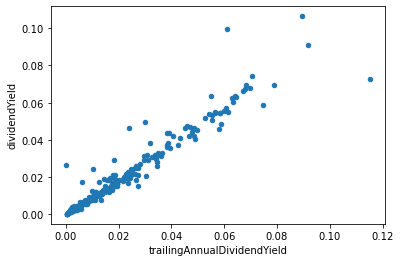

In [25]:
df_quant[['trailingAnnualDividendYield', 'dividendYield']].plot.scatter('trailingAnnualDividendYield', 'dividendYield')

* 'trailingAnnualDividendYield', 'dividendYield' look similar, drop dividendYield.
* Replace null with 0 for trailingAnnualDividendYield and payoutRatio

### Check Growth

In [26]:
fields['Growth']

['revenueGrowth',
 'earningsGrowth',
 'earningsQuarterlyGrowth',
 'pegRatio',
 'trailingPegRatio']

In [27]:
# Observe
df_quant.loc[df_quant[['revenueGrowth',
 'earningsGrowth',
 'earningsQuarterlyGrowth']].isnull().any(axis=1), ['revenueGrowth',
 'earningsGrowth',
 'earningsQuarterlyGrowth']]

,revenueGrowth,earningsGrowth,earningsQuarterlyGrowth
002714.SZ,-0.187,NaN,NaN
300498.SZ,-0.182,NaN,NaN
002466.SZ,1.777,NaN,NaN
600570.SS,0.487,NaN,NaN
600588.SS,0.052,NaN,NaN
600009.SS,-0.025,NaN,NaN
601989.SS,0.175,NaN,NaN
000876.SZ,0.095,NaN,NaN
600011.SS,0.168,NaN,NaN
600029.SS,0.020,NaN,NaN


replace null by 0 for growth

### Check pending normalize attributes

In [28]:
cat_to_norm = [cat for cat, f_list in fields.items() if '_to_norm' in cat]

In [29]:
df_quant.loc[:, fields[cat_to_norm[0]]].describe().T['count']

52WeekChange              9.0
twoHundredDayAverage    300.0
fiftyDayAverage         300.0
previousClose           300.0
fiftyTwoWeekHigh        300.0
fiftyTwoWeekLow         300.0
dayLow                  300.0
dayHigh                 300.0
Name: count, dtype: float64

In [30]:
for cat in cat_to_norm:
    print('-----------')
    print('Category:', cat)
    print((df_quant.loc[:, fields[cat]].describe().T['count']))


-----------
Category: Momentum_to_norm
52WeekChange              9.0
twoHundredDayAverage    300.0
fiftyDayAverage         300.0
previousClose           300.0
fiftyTwoWeekHigh        300.0
fiftyTwoWeekLow         300.0
dayLow                  300.0
dayHigh                 300.0
Name: count, dtype: float64
-----------
Category: Liquidity_to_norm
averageDailyVolume10Day    300.0
averageVolume10days        300.0
averageVolume              300.0
floatShares                300.0
sharesOutstanding          299.0
Name: count, dtype: float64
-----------
Category: Value_to_norm
forwardEps                    265.0
trailingEps                   299.0
dividendRate                  275.0
trailingAnnualDividendRate    292.0
totalRevenue                  300.0
Name: count, dtype: float64
-----------
Category: Financial leverage_to_norm
totalCash    299.0
totalDebt    299.0
Name: count, dtype: float64


* drop 52WeekChange, forwardEps
* dividendRate replaced by dividend yield, drop trailingAnnualDividendRate  

## Execute data cleaning

In [31]:
# remove dropped attributes from fields
def remove_from_fields_dict(fields, cat, list_remove):
    fields[cat] = [f for f in fields[cat] if f not in list_remove]
    return fields

In [32]:
# add attributes to fields
def add_to_fields_dict(fields, cat, list_add):
    fields[cat] = fields[cat] + list_add
    return fields

### Drop stocks 
with more than 15 null fields. stocks_to_drop

In [33]:
df_quant.drop(stocks_to_drop, axis=0, inplace=True)

In [34]:
df_nom.drop(stocks_to_drop, axis=0, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_42752\2068560930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nom.drop(stocks_to_drop, axis=0, inplace=True)


### Market Expectation
There are stocks with no analyst coverage. For these stocks, we should replace targetMeanPrice, targetHighPrice and targetLowPrice by the latest stock price; numberOfAnalystOpinions is 0.

In [35]:
fields['Market expectation']

['targetMeanPrice',
 'targetHighPrice',
 'targetLowPrice',
 'numberOfAnalystOpinions']

In [36]:
no_analyst_stocks = df_quant[df_quant['numberOfAnalystOpinions'].isnull()].index.tolist()

In [37]:
df_quant.loc[no_analyst_stocks, ['targetMeanPrice', 'targetHighPrice', 'targetLowPrice']] = \
    df_quant.loc[no_analyst_stocks, 'currentPrice']
df_quant.loc[no_analyst_stocks, ['numberOfAnalystOpinions']] = 0

In [38]:
# Check
df_quant.loc[no_analyst_stocks, ['currentPrice','targetMeanPrice', 'targetHighPrice', 'targetLowPrice', 'numberOfAnalystOpinions']].head()

,currentPrice,targetMeanPrice,targetHighPrice,targetLowPrice,numberOfAnalystOpinions
601989.SS,3.92,3.92,3.92,3.92,0.0
601901.SS,6.78,6.78,6.78,6.78,0.0
002252.SZ,6.23,6.23,6.23,6.23,0.0
600795.SS,2.75,2.75,2.75,2.75,0.0
600918.SS,8.38,8.38,8.38,8.38,0.0


Normalize targetPrice by currentPrice

In [39]:
df_quant[['targetMeanPrice', 'targetHighPrice', 'targetLowPrice']] \
    = np.log(df_quant[['targetMeanPrice', 'targetHighPrice', 'targetLowPrice']].divide(df_quant['currentPrice'], axis=0))

In [40]:
df_quant[['targetMeanPrice', 'targetHighPrice', 'targetLowPrice']]

,targetMeanPrice,targetHighPrice,targetLowPrice
600519.SS,0.275791,0.417261,0.060852
300750.SZ,0.377585,0.706131,-0.298991
600036.SS,0.369039,0.606238,-0.156779
601318.SS,0.474449,0.800076,-0.297774
000858.SZ,0.493834,0.711777,0.219820
...,...,...,...
002032.SZ,0.259955,0.605888,-0.125793
000800.SZ,0.417423,0.537249,0.046626
601698.SS,0.000000,0.000000,0.000000
605499.SS,0.408788,0.622445,0.295714


### Size
* impute the missing values of fullTimeEmployees since only 29 stocks are missing it. We should use marketCap with Linear Regression for this.
* There seems to be some negative enterpriseValue (EV = market cap stock + MV preferred eq + MV debt + minority interest - cash and investments).  
* enterpriseValue Need to divide by market cap
* bookValue is per share, need to divide by current price

See if marketCap and fullTimeEmployees have a linear relationship: not really.  Potentially due to companies being in different industry have different labour intensity.

In [41]:
df_quant_size = df_quant.loc[:, fields['Size']]

In [42]:
stocks_no_employees = df_quant_size[df_quant_size['fullTimeEmployees'].isnull()].index.tolist()

In [43]:
def log_columns_missing_y(main_df, X_col, y_col, list_idx_missing, col_prefix='log-', log_X=True, log_y=True):
    df = main_df[[X_col, y_col]].copy()
    
    # Log the X on all indices
    if log_X:
        df.loc[:, '{}{}'.format(col_prefix, X_col)] = df.loc[:, '{}'.format(X_col)].map(np.log)
        
    # log the y on non-missing indices
    if log_y:
        df.loc[~df.index.isin(list_idx_missing), '{}{}'.format(col_prefix, y_col)] = \
            df.loc[~df.index.isin(list_idx_missing), '{}'.format(y_col)].map(np.log)
    
    return df


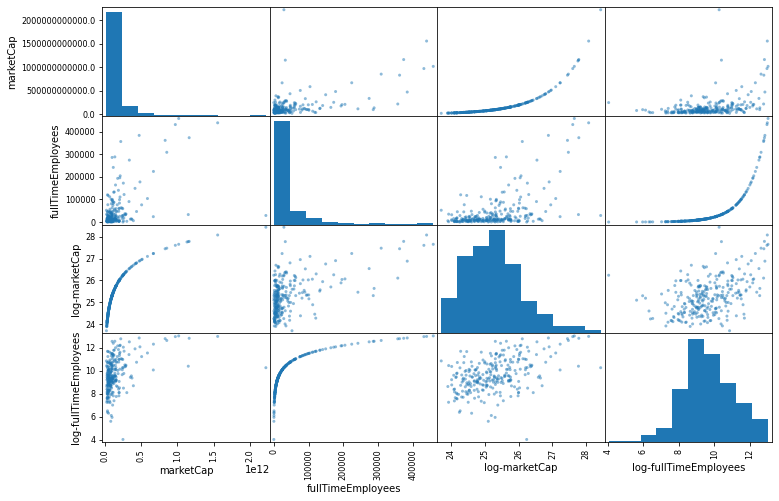

In [44]:
pd.plotting.scatter_matrix(log_columns_missing_y(df_quant_size, 'marketCap', 'fullTimeEmployees', stocks_no_employees),
                           figsize=(12,8),
                           diagonal='hist');

On log scale the relationship looks a bit stronger. We will use linear regression on log scale to impute the missing fullTimeEmployees.

In [45]:
from sklearn.linear_model import LinearRegression

def lr_impute(df_main, X_col, y_col, list_idx_missing, drop_from_training=[]):
    df = df_main.copy()
    X_train = df.loc[~df.index.isin(list_idx_missing + drop_from_training), X_col].to_numpy().reshape(-1, 1)
    y_train = df.loc[~df.index.isin(list_idx_missing + drop_from_training), y_col].to_numpy().reshape(-1, 1)
    
    lr = LinearRegression().fit(X_train, y_train)
        
    # Impute missing by lr predict
    X_impute = df.loc[df.index.isin(list_idx_missing), X_col].to_numpy().reshape(-1, 1)
    df.loc[df.index.isin(list_idx_missing), y_col] = lr.predict(X_impute).reshape(-1)
    
    return df

In [46]:
df_employ_impute = lr_impute(log_columns_missing_y(df_quant_size, 'marketCap', 'fullTimeEmployees', stocks_no_employees), 
                             'log-marketCap', 'log-fullTimeEmployees', stocks_no_employees)

We will keep log-fullTimeEmployees only

In [47]:
# Drop fullTimeEmployees
df_quant.drop('fullTimeEmployees', axis=1, inplace=True)
fields = remove_from_fields_dict(fields, 'Size', ['fullTimeEmployees'])

# Add log-fullTimeEmployees
df_quant.loc[:, 'log-fullTimeEmployees'] = df_employ_impute.loc[:, 'log-fullTimeEmployees']
fields = add_to_fields_dict(fields, 'Size', ['log-fullTimeEmployees'])

Divide enterpriseValue by marketCap to produce enterprise-per-mktcap.
Drop enterpriseValue

In [48]:
df_quant.loc[:, 'enterprise-per-mktcap'] = df_quant.loc[:, 'enterpriseValue'] / df_info.loc[:, 'marketCap'] 
df_quant.drop('enterpriseValue', axis=1, inplace=True)

fields = remove_from_fields_dict(fields, 'Size', ['enterpriseValue'])
fields = add_to_fields_dict(fields, 'Size', ['enterprise-per-mktcap'])

Divide bookValue by currentPrice to produce BV-per-P

In [49]:
df_quant.loc[:, 'BV-per-P'] = df_quant.loc[:, 'bookValue'] / df_quant.loc[:, 'currentPrice']
df_quant.drop('bookValue', axis=1, inplace=True)

fields = remove_from_fields_dict(fields, 'Size', ['bookValue'])
fields = add_to_fields_dict(fields, 'Size', ['BV-per-P'])

In [50]:
# pkl.dump(df_quant, open('df_quant_2_1_3_3.pkl', 'wb'))

In [51]:
# df_quant = pkl.load(open('df_quant_2_1_3_3.pkl', 'rb'))

### Financial leverage
* drop currentRatio, quickRatio
* debt to equity: Impute from Cash per share divided by stock price


In [52]:
fields['Financial leverage']

['currentRatio', 'debtToEquity', 'totalCashPerShare', 'quickRatio']

In [53]:
# Drop current and quick ratios
df_quant.drop(['currentRatio', 'quickRatio'], axis=1, inplace=True)

fields = remove_from_fields_dict(fields, 'Financial leverage', ['currentRatio', 'quickRatio'])

In [54]:
df_quant.loc[:, 'cash-per-price'] = df_quant.loc[:, 'totalCashPerShare'] / df_quant.loc[:, 'currentPrice']
df_quant.drop(['totalCashPerShare'], axis=1, inplace=True)

fields = add_to_fields_dict(fields, 'Financial leverage', ['cash-per-price'])
fields = remove_from_fields_dict(fields, 'Financial leverage', ['totalCashPerShare'])

In [55]:
# Replace cash null by 0
print('# of null in cash-per-price:', df_quant['cash-per-price'].isnull().sum())
stock_cash_null = df_quant[df_quant['cash-per-price'].isnull()].index.to_list()
df_quant.loc[stock_cash_null, ['cash-per-price']] = 0
print('Value replaced by 0')

# of null in cash-per-price: 1
Value replaced by 0


In [56]:
print('# of null in debtToEquity', df_quant['debtToEquity'].isnull().sum())

# of null in debtToEquity 28


In [57]:
no_DE_stocks = df_quant[df_quant['debtToEquity'].isnull()].index.tolist()

df_cash_debt_with_log = log_columns_missing_y(df_quant, 'cash-per-price', 'debtToEquity', no_DE_stocks)

C:\Users\user\.conda\envs\capstone\lib\site-packages\pandas\core\base.py:880: RuntimeWarning: divide by zero encountered in log
  new_values = map_f(values, mapper)
C:\Users\user\.conda\envs\capstone\lib\site-packages\pandas\core\base.py:880: RuntimeWarning: divide by zero encountered in log
  new_values = map_f(values, mapper)


Since we replaced cash null by 0, the log value would produce an -inf value.  We will drop this and other inf data point for the purpose of regression imputation only.

C:\Users\user\.conda\envs\capstone\lib\site-packages\pandas\core\base.py:880: RuntimeWarning: divide by zero encountered in log
  new_values = map_f(values, mapper)
C:\Users\user\.conda\envs\capstone\lib\site-packages\pandas\core\base.py:880: RuntimeWarning: divide by zero encountered in log
  new_values = map_f(values, mapper)


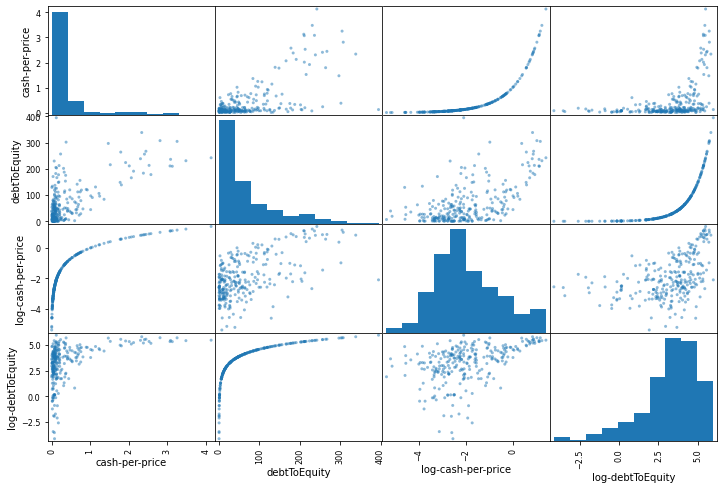

In [58]:
drop_cash_debt_plot = df_cash_debt_with_log.loc[(df_cash_debt_with_log.isnull().any(axis=1) | df_cash_debt_with_log.isin([np.inf, -np.inf]).any(axis=1)), :].index.tolist()

pd.plotting.scatter_matrix(log_columns_missing_y(df_quant, 'cash-per-price', 'debtToEquity', no_DE_stocks).drop(drop_cash_debt_plot, axis=0),
                           figsize=(12,8),
                           diagonal='hist');

The relationship between log-debtToEquity and log-cash-per-price does not look to have a constant variance when using a linear regression.  However, we will just attempt linear imputation at this point and perhaps revisit this point in the future.

In [59]:
df_de_impute = lr_impute(log_columns_missing_y(df_quant, 'cash-per-price', 'debtToEquity', no_DE_stocks), 
                         'log-cash-per-price', 'log-debtToEquity', no_DE_stocks, drop_cash_debt_plot)

# exp the log imputed values to normal scale for debtToEquity
df_quant.loc[no_DE_stocks, 'debtToEquity'] = df_de_impute.loc[no_DE_stocks, 'log-debtToEquity'].map(np.exp)

C:\Users\user\.conda\envs\capstone\lib\site-packages\pandas\core\base.py:880: RuntimeWarning: divide by zero encountered in log
  new_values = map_f(values, mapper)
C:\Users\user\.conda\envs\capstone\lib\site-packages\pandas\core\base.py:880: RuntimeWarning: divide by zero encountered in log
  new_values = map_f(values, mapper)


### Value
* returnOnAsset and returnOnEquity: replace null with 0
* forwardPE and trailingPE replace with mean
* 'trailingAnnualDividendYield', 'dividendYield' look similar, drop dividendYield.
* Replace null with 0 for trailingAnnualDividendYield and payoutRatio

In [60]:
from sklearn.impute import SimpleImputer
zero_imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
mean_imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df_quant[['returnOnAssets' , 'returnOnEquity']] = zero_imp.fit_transform(df_quant[['returnOnAssets' , 'returnOnEquity']])
df_quant[['forwardPE', 'trailingPE']] = mean_imp.fit_transform(df_quant[['forwardPE', 'trailingPE']])
df_quant.drop('dividendYield', axis=1, inplace=True)
df_quant[['trailingAnnualDividendYield', 'payoutRatio']] = zero_imp.fit_transform(df_quant[['trailingAnnualDividendYield', 'payoutRatio']])

fields = remove_from_fields_dict(fields, 'Value', ['dividendYield'])

### Growth
* Drop pegRatio and trailingPegRatio
* Replace null by 0 for earningsGrowth and earningsQuarterlyGrowth

In [61]:
df_quant.drop(['pegRatio', 'trailingPegRatio'], axis=1, inplace=True)
fields = remove_from_fields_dict(fields, 'Growth', ['pegRatio', 'trailingPegRatio'])

zero_imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
df_quant[['revenueGrowth','earningsGrowth', 'earningsQuarterlyGrowth']] \
    = zero_imp.fit_transform(df_quant[['revenueGrowth', 'earningsGrowth', 'earningsQuarterlyGrowth']])

### To Norm Columns
* Momentum_to_norm: drop 52WeekChange, forwardEps
* Value_to_norm: drop trailingAnnualDividendRate, dividendRate


In [62]:
df_quant.drop(['52WeekChange', 'forwardEps', 'trailingAnnualDividendRate', 'dividendRate'], axis=1, inplace=True)

# dayLow and dayHigh are too short term
df_quant.drop(['dayLow', 'dayHigh'], axis=1, inplace=True)

fields = remove_from_fields_dict(fields, 'Momentum_to_norm', ['52WeekChange', 'dayLow', 'dayHigh']);
fields = remove_from_fields_dict(fields, 'Value_to_norm', ['forwardEps', 'trailingAnnualDividendRate', 'dividendRate']);

## Normalize the to_norm columns

In [63]:
[(cat,f) for cat, f_list in fields.items() for f in f_list if '_to_norm' in cat]

[('Momentum_to_norm', 'twoHundredDayAverage'),
 ('Momentum_to_norm', 'fiftyDayAverage'),
 ('Momentum_to_norm', 'previousClose'),
 ('Momentum_to_norm', 'fiftyTwoWeekHigh'),
 ('Momentum_to_norm', 'fiftyTwoWeekLow'),
 ('Liquidity_to_norm', 'averageDailyVolume10Day'),
 ('Liquidity_to_norm', 'averageVolume10days'),
 ('Liquidity_to_norm', 'averageVolume'),
 ('Liquidity_to_norm', 'floatShares'),
 ('Liquidity_to_norm', 'sharesOutstanding'),
 ('Value_to_norm', 'trailingEps'),
 ('Value_to_norm', 'totalRevenue'),
 ('Financial leverage_to_norm', 'totalCash'),
 ('Financial leverage_to_norm', 'totalDebt')]

### Momentum_to_norm

In [64]:
df_mom_normed = np.log(df_quant[fields['Momentum_to_norm']].divide(df_quant['currentPrice'], axis=0))

df_mom_normed.columns = ['{}{}'.format(c, '_logprice') for c in df_mom_normed.columns]
df_quant = df_quant.drop(fields['Momentum_to_norm'],axis=1).merge(df_mom_normed, left_index=True, right_index=True)

fields = add_to_fields_dict(fields, 'Momentum', df_mom_normed.columns.tolist())

### Liquidity_to_norm

In [65]:
fields['Liquidity_to_norm']

['averageDailyVolume10Day',
 'averageVolume10days',
 'averageVolume',
 'floatShares',
 'sharesOutstanding']

In [66]:
# Volume as market value: volume times currentPrice
df_liq_price_normed = df_quant[['averageDailyVolume10Day', 'averageVolume10days', 'averageVolume']].multiply(df_quant['currentPrice'], axis=0)
df_liq_price_normed.columns = ['{}{}'.format(c, '_mv') for c in df_liq_price_normed.columns]

In [67]:
# Volume as % of float shares
df_liq_float_normed = df_quant[['averageDailyVolume10Day', 'averageVolume10days', 'averageVolume']].divide(df_quant['floatShares'], axis=0)
df_liq_float_normed.columns = ['{}{}'.format(c, '-perFloat') for c in df_liq_float_normed.columns]

In [68]:
# Float %
df_quant['float_percent'] = df_quant['floatShares'] * df_quant['currentPrice'] / df_quant['marketCap']

fields = add_to_fields_dict(fields, 'Liquidity', ['float_percent'])

In [69]:
df_quant = (df_quant.drop(fields['Liquidity_to_norm'],axis=1)
                     .merge(df_liq_price_normed, left_index=True, right_index=True)
                     .merge(df_liq_float_normed, left_index=True, right_index=True)
)

fields = add_to_fields_dict(fields, 'Liquidity', (df_liq_price_normed.columns.tolist() 
                                                 + df_liq_float_normed.columns.tolist() 
                                                 )
                           )

### Value_to_norm

In [70]:
fields['Value_to_norm']

['trailingEps', 'totalRevenue']

In [71]:
df_quant['e/p'] = df_quant['trailingEps'] / df_quant['currentPrice']
df_quant['rev/mktcap'] = df_quant['totalRevenue'] / df_quant['marketCap']
df_quant.drop(fields['Value_to_norm'],axis=1, inplace=True)

fields = add_to_fields_dict(fields, 'Value', ['e/p', 'rev/mktcap'])

### Financial leverage to norm

In [72]:
fields['Financial leverage_to_norm']

['totalCash', 'totalDebt']

Cash and Debt are already captured by other attributes.

In [73]:
df_quant.drop(fields['Financial leverage_to_norm'],axis=1, inplace=True)

In [74]:
# Remove all to_norm from fields
for cat_norm in [cat for cat, f_list in fields.items() if 'to_norm' in cat]:
    del fields[cat_norm]

In [75]:
fields

{'Market expectation': ['targetMeanPrice',
  'targetHighPrice',
  'targetLowPrice',
  'numberOfAnalystOpinions'],
 'Size': ['marketCap',
  'log-fullTimeEmployees',
  'enterprise-per-mktcap',
  'BV-per-P'],
 'Momentum': ['currentPrice',
  'twoHundredDayAverage_logprice',
  'fiftyDayAverage_logprice',
  'previousClose_logprice',
  'fiftyTwoWeekHigh_logprice',
  'fiftyTwoWeekLow_logprice'],
 'Liquidity': ['heldPercentInstitutions',
  'heldPercentInsiders',
  'float_percent',
  'averageDailyVolume10Day_mv',
  'averageVolume10days_mv',
  'averageVolume_mv',
  'averageDailyVolume10Day-perFloat',
  'averageVolume10days-perFloat',
  'averageVolume-perFloat'],
 'Growth': ['revenueGrowth', 'earningsGrowth', 'earningsQuarterlyGrowth'],
 'Value': ['ebitdaMargins',
  'profitMargins',
  'grossMargins',
  'operatingMargins',
  'returnOnAssets',
  'returnOnEquity',
  'revenuePerShare',
  'priceToSalesTrailing12Months',
  'priceToBook',
  'forwardPE',
  'trailingPE',
  'trailingAnnualDividendYield',
  

## Check again df_quant is clean

In [76]:
fields

{'Market expectation': ['targetMeanPrice',
  'targetHighPrice',
  'targetLowPrice',
  'numberOfAnalystOpinions'],
 'Size': ['marketCap',
  'log-fullTimeEmployees',
  'enterprise-per-mktcap',
  'BV-per-P'],
 'Momentum': ['currentPrice',
  'twoHundredDayAverage_logprice',
  'fiftyDayAverage_logprice',
  'previousClose_logprice',
  'fiftyTwoWeekHigh_logprice',
  'fiftyTwoWeekLow_logprice'],
 'Liquidity': ['heldPercentInstitutions',
  'heldPercentInsiders',
  'float_percent',
  'averageDailyVolume10Day_mv',
  'averageVolume10days_mv',
  'averageVolume_mv',
  'averageDailyVolume10Day-perFloat',
  'averageVolume10days-perFloat',
  'averageVolume-perFloat'],
 'Growth': ['revenueGrowth', 'earningsGrowth', 'earningsQuarterlyGrowth'],
 'Value': ['ebitdaMargins',
  'profitMargins',
  'grossMargins',
  'operatingMargins',
  'returnOnAssets',
  'returnOnEquity',
  'revenuePerShare',
  'priceToSalesTrailing12Months',
  'priceToBook',
  'forwardPE',
  'trailingPE',
  'trailingAnnualDividendYield',
  

In [77]:
# Drop currentPrice
df_quant.drop('currentPrice', axis=1, inplace=True)

In [78]:
remove_attribute_from_fields(fields,'Momentum', 'currentPrice')

{'Market expectation': ['targetMeanPrice',
  'targetHighPrice',
  'targetLowPrice',
  'numberOfAnalystOpinions'],
 'Size': ['marketCap',
  'log-fullTimeEmployees',
  'enterprise-per-mktcap',
  'BV-per-P'],
 'Momentum': ['twoHundredDayAverage_logprice',
  'fiftyDayAverage_logprice',
  'previousClose_logprice',
  'fiftyTwoWeekHigh_logprice',
  'fiftyTwoWeekLow_logprice'],
 'Liquidity': ['heldPercentInstitutions',
  'heldPercentInsiders',
  'float_percent',
  'averageDailyVolume10Day_mv',
  'averageVolume10days_mv',
  'averageVolume_mv',
  'averageDailyVolume10Day-perFloat',
  'averageVolume10days-perFloat',
  'averageVolume-perFloat'],
 'Growth': ['revenueGrowth', 'earningsGrowth', 'earningsQuarterlyGrowth'],
 'Value': ['ebitdaMargins',
  'profitMargins',
  'grossMargins',
  'operatingMargins',
  'returnOnAssets',
  'returnOnEquity',
  'revenuePerShare',
  'priceToSalesTrailing12Months',
  'priceToBook',
  'forwardPE',
  'trailingPE',
  'trailingAnnualDividendYield',
  'payoutRatio',
  '

In [79]:
# Drop revenuePerShare
df_quant.drop('revenuePerShare', axis=1, inplace=True)
remove_attribute_from_fields(fields,'Value', 'revenuePerShare');

In [80]:
# Any remaining null values?
df_quant.loc[df_quant.isnull().any(axis=1), df_quant.isnull().any(axis=0)]

""


In [81]:
set(df_quant.columns) \
    - set([f for cat, f_list in fields.items() for f in f_list if cat not in ['Location', 'Sector industry']])

set()

In [82]:
set([f for cat, f_list in fields.items() for f in f_list if cat not in ['Location', 'Sector industry']]) \
    - set(df_quant.columns)

set()

In [83]:
df_quant.columns

Index(['targetMeanPrice', 'targetHighPrice', 'targetLowPrice',
       'numberOfAnalystOpinions', 'marketCap', 'heldPercentInstitutions',
       'heldPercentInsiders', 'revenueGrowth', 'earningsGrowth',
       'earningsQuarterlyGrowth', 'ebitdaMargins', 'profitMargins',
       'grossMargins', 'operatingMargins', 'returnOnAssets', 'returnOnEquity',
       'priceToSalesTrailing12Months', 'priceToBook', 'forwardPE',
       'trailingPE', 'trailingAnnualDividendYield', 'payoutRatio',
       'debtToEquity', 'log-fullTimeEmployees', 'enterprise-per-mktcap',
       'BV-per-P', 'cash-per-price', 'twoHundredDayAverage_logprice',
       'fiftyDayAverage_logprice', 'previousClose_logprice',
       'fiftyTwoWeekHigh_logprice', 'fiftyTwoWeekLow_logprice',
       'float_percent', 'averageDailyVolume10Day_mv', 'averageVolume10days_mv',
       'averageVolume_mv', 'averageDailyVolume10Day-perFloat',
       'averageVolume10days-perFloat', 'averageVolume-perFloat', 'e/p',
       'rev/mktcap'],
      dtype=

## One-hot Nominal attributes

In [84]:
pd.get_dummies(df_nom['industry'])

,Advertising Agencies,Aerospace & Defense,Agricultural Inputs,Airlines,Airports & Air Services,Aluminum,Asset Management,Auto Manufacturers,Auto Parts,Banks—Diversified,...,Specialty Chemicals,Specialty Industrial Machinery,Specialty Retail,Steel,Telecom Services,Textile Manufacturing,Thermal Coal,Tools & Accessories,Utilities—Independent Power Producers,Utilities—Renewable
600519.SS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
300750.SZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
600036.SS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
601318.SS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000858.SZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
002032.SZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000800.SZ,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
601698.SS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
605499.SS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data Cleaning and Processing - Stock Price and Returns

In [85]:
df_5y.columns.get_level_values(0).unique()

Index(['Close', 'Dividends', 'High', 'Low', 'Open', 'Stock Splits', 'Volume'], dtype='object')

## Check stock prices are adjusted for stock splits.

In [86]:
df_5y.loc[df_5y[('Stock Splits', '603986.SS')]!=0,('Stock Splits', '603986.SS')]

Date
2017-05-22    2.0
2018-05-21    1.0
2019-04-30    NaN
2020-05-07    1.0
2021-05-21    1.0
Name: (Stock Splits, 603986.SS), dtype: float64

In [87]:
df_5y.loc[df_5y[('Stock Splits', '603986.SS')]!=0,('Close', '603986.SS')]

Date
2017-05-22     34.180199
2018-05-21     66.436501
2019-04-30           NaN
2020-05-07    160.908920
2021-05-21    121.800003
Name: (Close, 603986.SS), dtype: float64

In [88]:
from pandas.tseries.offsets import BDay

date_index = df_5y.loc[df_5y[('Stock Splits', '603986.SS')]!=0,('Close', '603986.SS')].index - BDay(1)

for date in date_index:
    try:
        display(df_5y.loc[date ,('Close', '603986.SS')])
    except KeyError as e:
        print(e)

34.951534271240234

60.39475631713867

Timestamp('2019-04-29 00:00:00')


155.14588928222656

123.85713958740234

After checking, there was no large jump in prices by stock splits, which means stock prices are adjusted by Yahoo Finance for stock splits. We can use the stock prices as is to compute stock returns that we need for analysis.

<AxesSubplot:xlabel='Date'>

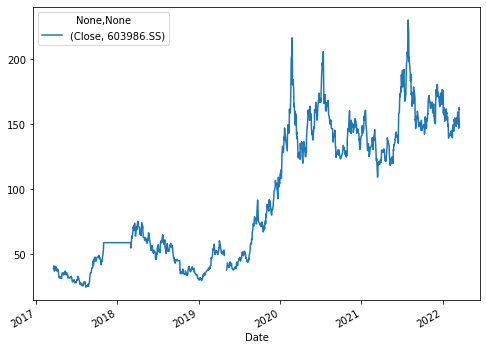

In [89]:
df_5y.loc[:, [('Close', '603986.SS')]].plot(figsize=(8,6))

## Compute Weekly returns from the stock price DataFrame

In [90]:
# Weekly return is log_n(price_t / price_t-1)
df_5y_close = df_5y['Close'].ffill(axis=0)

In [91]:
df_5y_close.loc[t_1, :]

000001.SZ     14.900000
000002.SZ     16.650000
000063.SZ     25.040001
000066.SZ     12.300000
000069.SZ      6.530000
                ...    
688363.SS    114.480003
688396.SS     57.779999
688561.SS     63.529999
688599.SS     71.000000
688981.SS     49.740002
Name: 2022-03-11 00:00:00, Length: 300, dtype: float64

In [92]:
def log_return(df_close_px, fri_weekly=False, t=t, t_1=t_1):
    if fri_weekly:
        px_t = df_close_px.resample('W-FRI').last()
        px_t_1 = df_close_px.resample('W-FRI').last().shift(1)
    else:
        px_t = df_close_px.loc[t, :]
        px_t_1 = df_close_px.loc[t_1, :]
        
    # For the future: Holidays are not handled here by filling n/a with 0 returns.  
    return np.log(px_t/px_t_1).fillna(0)

Some stocks were newly listed within the last 5 years, finding a time period when we have 90% of stock data available.  Looks like a 2-year period should cover.

<AxesSubplot:xlabel='Date'>

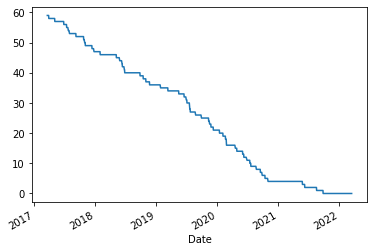

In [93]:
df_5y_close.isnull().sum(axis=1).plot()

In [94]:
df_2y = df_5y_close.loc[df_5y_close.index > (df_5y_close.index[-1] - datetime.timedelta(days=2*365)), :]

# Risk Factor Regression


The currentPrice in df_info must match t-1 price for this regression to work.

Otherwise, all marketPrice related attributes fields should be recomputed using stock price data.

We will align the date instead of recomputation to do the proof of concept, and recomputation for future implementation.

In [95]:
df_info['currentPrice']

600519.SS    1769.01
300750.SZ     493.55
600036.SS      44.45
601318.SS      47.14
000858.SZ     171.77
              ...   
002032.SZ      47.63
000800.SZ       8.59
601698.SS      12.12
605499.SS     156.24
300888.SZ      71.24
Name: currentPrice, Length: 300, dtype: object

In [96]:
df_2y.iloc[-10:, :].T.merge(df_info['currentPrice'], left_index=True, right_index=True)

,2022-03-07 00:00:00,2022-03-08 00:00:00,2022-03-09 00:00:00,2022-03-10 00:00:00,2022-03-11 00:00:00,2022-03-14 00:00:00,2022-03-15 00:00:00,2022-03-16 00:00:00,2022-03-17 00:00:00,2022-03-18 00:00:00,currentPrice
000001.SZ,14.720000,14.310000,13.840000,14.570000,14.900000,14.490000,13.680000,14.310000,14.450000,14.700000,14.9
000002.SZ,18.540001,17.670000,16.980000,16.770000,16.650000,16.090000,14.800000,15.510000,16.680000,17.450001,16.65
000063.SZ,26.150000,25.660000,25.350000,25.400000,25.040001,24.059999,22.549999,23.510000,23.610001,24.000000,25.04
000066.SZ,12.990000,12.510000,12.130000,12.150000,12.300000,12.140000,11.470000,11.780000,11.870000,11.990000,12.3
000069.SZ,6.900000,6.590000,6.380000,6.520000,6.530000,6.350000,5.840000,6.070000,6.350000,6.550000,6.53
...,...,...,...,...,...,...,...,...,...,...,...
688363.SS,115.150002,112.000000,108.589996,112.540001,114.480003,105.910004,102.800003,107.900002,112.220001,112.459999,114.48
688396.SS,54.689999,54.830002,55.680000,55.540001,57.779999,56.630001,54.900002,58.810001,59.099998,60.930000,57.78
688561.SS,63.480000,61.939999,60.349998,62.200001,63.529999,60.480000,57.040001,59.369999,60.810001,60.200001,63.53
688599.SS,73.190002,73.190002,72.500000,73.620003,71.000000,70.599998,71.099998,72.540001,68.120003,68.690002,71


In [97]:
last_week_return = log_return(df_2y).rename('return')
last_week_return

000001.SZ   -0.013514
000002.SZ    0.046929
000063.SZ   -0.042421
000066.SZ   -0.025526
000069.SZ    0.003058
               ...   
688363.SS   -0.017803
688396.SS    0.053083
688561.SS   -0.053840
688599.SS   -0.033076
688981.SS   -0.060926
Name: return, Length: 300, dtype: float64

In [98]:
# Standard normalize df_quant to z-scores
df_quant_z = (df_quant - df_quant.mean(axis=0))  / df_quant.std(axis=0)

In [99]:
df_factors = df_quant_z.merge(pd.get_dummies(df_nom['industry']), left_index=True, right_index=True, how='left')

In [100]:
df_factor_train = df_factors.merge(last_week_return, left_index=True, right_index=True, how='left')
df_factor_train

,targetMeanPrice,targetHighPrice,targetLowPrice,numberOfAnalystOpinions,marketCap,heldPercentInstitutions,heldPercentInsiders,revenueGrowth,earningsGrowth,earningsQuarterlyGrowth,...,Specialty Industrial Machinery,Specialty Retail,Steel,Telecom Services,Textile Manufacturing,Thermal Coal,Tools & Accessories,Utilities—Independent Power Producers,Utilities—Renewable,return
600519.SS,-0.257822,-0.494579,0.106685,1.829428,9.140581,0.021626,0.345472,-0.352273,-0.196676,-0.209266,...,0,0,0,0,0,0,0,0,0,-0.035220
300750.SZ,0.170790,0.542667,-0.932414,2.545396,4.406853,0.566729,-0.056259,2.364114,0.571652,0.697608,...,0,0,0,0,0,0,0,0,0,0.033766
600036.SS,0.134805,0.183982,-0.521756,2.903379,4.328217,-0.268862,-0.097027,2.496785,-0.070898,-0.098408,...,0,0,0,0,0,0,0,0,0,0.037965
601318.SS,0.578641,0.879996,-0.928900,1.292453,2.995936,0.044688,-2.129636,-0.781768,-0.486327,-0.518742,...,0,0,0,0,0,0,0,0,0,0.016620
000858.SZ,0.660265,0.562939,0.565728,1.650436,2.273686,0.334919,0.035334,-0.336533,-0.199551,-0.213885,...,0,0,0,0,0,0,0,0,0,-0.022788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
002032.SZ,-0.324503,0.182724,-0.432280,0.755477,-0.503685,-0.179349,1.485081,-0.307300,-0.318862,-0.367853,...,0,0,0,0,0,0,0,0,0,-0.017366
000800.SZ,0.338529,-0.063738,0.065606,-0.855449,-0.497362,-0.976761,1.568617,-2.041021,-0.576888,-0.614972,...,0,0,0,0,0,0,0,0,0,-0.039174
601698.SS,-1.419065,-1.992835,-0.069033,-1.571417,-0.459686,-1.029716,1.894868,-0.696319,-0.415891,-0.443298,...,0,0,0,1,0,0,0,0,0,-0.025910
605499.SS,0.302171,0.242177,0.784885,-0.855449,-0.397778,-0.857866,1.531634,-0.140899,-0.217520,-0.136131,...,0,0,0,0,0,0,0,0,0,-0.057701


In [101]:
117-76

41

In [102]:
pd.get_dummies(df_nom['industry'])

,Advertising Agencies,Aerospace & Defense,Agricultural Inputs,Airlines,Airports & Air Services,Aluminum,Asset Management,Auto Manufacturers,Auto Parts,Banks—Diversified,...,Specialty Chemicals,Specialty Industrial Machinery,Specialty Retail,Steel,Telecom Services,Textile Manufacturing,Thermal Coal,Tools & Accessories,Utilities—Independent Power Producers,Utilities—Renewable
600519.SS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
300750.SZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
600036.SS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
601318.SS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000858.SZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
002032.SZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000800.SZ,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
601698.SS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
605499.SS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
df_factors_X = df_factor_train.loc[:, df_factor_train.columns!='return']
df_factors_y = df_factor_train['return']

In [104]:
df_factors_X.shape

(299, 117)

In [105]:
df_factors_X['previousClose_logprice']

600519.SS    0.913263
300750.SZ    0.114254
600036.SS    0.564452
601318.SS    0.141488
000858.SZ    0.427538
               ...   
002032.SZ   -0.257913
000800.SZ    0.008899
601698.SS   -0.095905
605499.SS    0.679985
300888.SZ   -1.118137
Name: previousClose_logprice, Length: 299, dtype: float64

# LinearRegression with sklearn

In [106]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
X_train = df_factors_X.to_numpy().astype(float)
y_train = df_factors_y.to_numpy().reshape(-1)
lr.fit(X= X_train, y=y_train)

LinearRegression()

In [107]:
lr.intercept_

lr.score(X_train, y_train)

residuals = (lr.predict(X_train) - y_train) 
residuals_percent = residuals / y_train

print('mean abs residuals:', abs(residuals[(residuals != np.inf) & (residuals != -np.inf)]).mean())

print('stdev of residuals:', residuals[(residuals != np.inf) & (residuals != -np.inf)].std())

mean abs residuals: 0.02099278735506881
stdev of residuals: 0.03098985387638634


C:\Users\user\AppData\Local\Temp\ipykernel_42752\2417173402.py:6: RuntimeWarning: divide by zero encountered in true_divide
  residuals_percent = residuals / y_train


<AxesSubplot:xlabel='Actual', ylabel='Predict'>

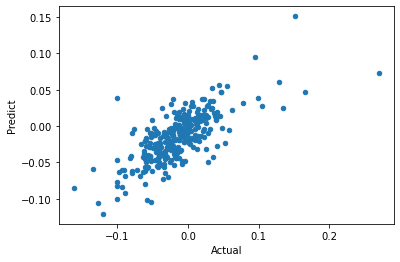

In [108]:
def plot_pred_true(y_pred, y_train):
    predict = pd.Series(y_pred, name='Predict')
    true = pd.Series(y_train, name='Actual')
    display(pd.DataFrame([predict, true]).T.plot.scatter(x='Actual', y='Predict'))
    return None

plot_pred_true(lr.predict(X_train), y_train)

In [109]:
lr.coef_.shape

(117,)

In [110]:
df_factors_X.shape

(299, 117)

In [111]:
coef = pd.Series(lr.coef_, index=df_factors_X.columns)
coef

targetMeanPrice                          0.005937
targetHighPrice                         -0.011910
targetLowPrice                          -0.003137
numberOfAnalystOpinions                  0.003825
marketCap                               -0.002733
                                           ...   
Textile Manufacturing                    0.032596
Thermal Coal                            -0.006140
Tools & Accessories                      0.022125
Utilities—Independent Power Producers    0.006094
Utilities—Renewable                      0.008338
Length: 117, dtype: float64

In [112]:
from collections import defaultdict

cat_coef_pos = defaultdict(float)
cat_coef_neg = defaultdict(float)

In [113]:
industry = df_nom['industry'].unique().tolist()

In [114]:
for cat, f_list in fields.items():
    for f in f_list:
        if f in coef.index:
            if coef[f] > 0:
                cat_coef_pos[cat] += coef[f]
            if coef[f] < 0:
                cat_coef_neg[cat] += coef[f]

In [115]:
for ind in industry:
    if coef[ind] > 0:
        cat_coef_pos['industry'] += coef[ind]
    if coef[ind] < 0:
        cat_coef_neg['industry'] += coef[ind]

In [116]:
df_sum_weights = pd.DataFrame({'Positive':cat_coef_pos, 'Negative': cat_coef_neg})
df_sum_weights['Sum Abs'] = abs(df_sum_weights['Positive']) + abs(df_sum_weights['Negative'])
df_sum_weights.sort_values('Sum Abs', ascending=False)

,Positive,Negative,Sum Abs
industry,1.175897,-1.175897,2.351793
Value,0.050538,-0.039892,0.090430
Growth,0.040747,-0.046142,0.086889
Liquidity,0.027409,-0.013501,0.040910
Market expectation,0.009762,-0.015047,0.024809
Momentum,0.014897,-0.006620,0.021518
Financial leverage,0.007918,-0.010923,0.018841
Size,0.006223,-0.006397,0.012620


<AxesSubplot:>

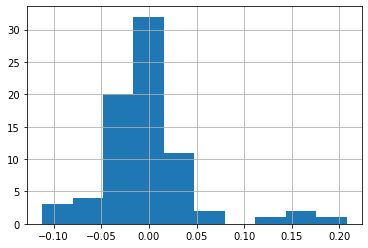

In [117]:
coef.loc[industry].hist()

# OLS with statsmodels

In [118]:
industry = df_nom['industry'].unique().tolist()
features = df_factors_X.columns.tolist()
non_industry_features = [f for f in features if f not in industry]

# Index of features not industry
model_idx_non_industry = np.array([i for i in range(len(features)) if features[i] in non_industry_features])

# Index of features of industry
model_idx_industry = np.array([i for i in range(len(features)) if features[i] not in non_industry_features])

## Regression without industry features

In [119]:
import statsmodels.api as sm

# Let's run regression without industry first
model_no_industry = sm.OLS(y_train, sm.add_constant(X_train[:, model_idx_non_industry])).fit()
y_pred_no_industry = model_no_industry.predict(sm.add_constant(X_train[:, model_idx_non_industry]))
print_model_no_industry = model_no_industry.summary()
print(print_model_no_industry)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     2.383
Date:                Mon, 18 Apr 2022   Prob (F-statistic):           2.99e-05
Time:                        13:39:44   Log-Likelihood:                 544.68
No. Observations:                 299   AIC:                            -1009.
Df Residuals:                     259   BIC:                            -861.3
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0157      0.002     -6.465      0.0

We see a large constant coeff - this might be driven by large market-wide beta, and it could be caused by omitting the industry factors.

In [120]:
# Check t-value > critical_val features

def print_coef_t_results(model, critical_val = 1.645, added_constant=True, skip_i=[]):
    count=0
    for i in np.argwhere(abs(model.tvalues)>critical_val).reshape(-1):
        if i not in skip_i:
            count+=1
            if added_constant:
                print((['constant']+features)[i], 'coef=', round(model.params[i],4), 't-value=', round(model.tvalues[i],4))
            else:
                print(features[i], 'coef=', round(model.params[i],4), 't-value=', round(model.tvalues[i],4))
    print('Number of features with > {} abs t-value:'.format(critical_val), count)
    res = np.argwhere(abs(model.tvalues)>critical_val).reshape(-1)
    if len(skip_i)>0:
        for i in skip_i:
            if i in res:
                res=np.delete(res, np.where(res==i))
    return res

In [121]:
sig_feature_idx_no_industry = print_coef_t_results(model_no_industry, critical_val=1.645, added_constant=True)

constant coef= -0.0157 t-value= -6.4647
priceToSalesTrailing12Months coef= 0.0131 t-value= 2.8474
payoutRatio coef= -0.008 t-value= -2.6256
debtToEquity coef= 0.0091 t-value= 2.0484
previousClose_logprice coef= -0.0119 t-value= -3.9601
Number of features with > 1.645 abs t-value: 5


In [122]:
sig_feature_idx_no_industry

array([ 0, 17, 22, 23, 30], dtype=int64)

<AxesSubplot:xlabel='Actual', ylabel='Predict'>

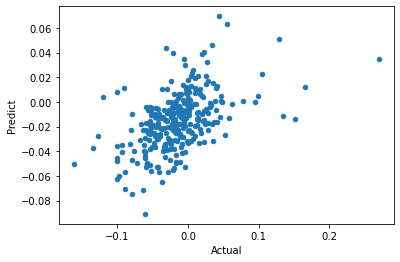

In [123]:
plot_pred_true(y_pred_no_industry, y_train)

## Regression with industry features

In [124]:
import statsmodels.api as sm

# Now we include all the industry factors
# then j controls how many of the other factors to include
# We do not add a constant and let the industry one-hot factor become the constant for that industry

model_w_industry = sm.OLS(y_train, X_train, hasconst=True).fit()
y_pred_w_industry = model_w_industry.predict(X_train)
print_model_w_industry = model_w_industry.summary()
print(print_model_w_industry)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     1.885
Date:                Mon, 18 Apr 2022   Prob (F-statistic):           6.42e-05
Time:                        13:39:44   Log-Likelihood:                 614.49
No. Observations:                 299   AIC:                            -999.0
Df Residuals:                     184   BIC:                            -573.4
Df Model:                         114                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0059      0.012      0.483      0.6

In [125]:
sig_feature_idx_w_industry = print_coef_t_results(model_w_industry, critical_val=1.645, added_constant=False, skip_i=model_idx_industry)

forwardPE coef= 0.0071 t-value= 1.7143
payoutRatio coef= -0.0088 t-value= -2.4117
previousClose_logprice coef= -0.0065 t-value= -1.6515
Number of features with > 1.645 abs t-value: 3


<AxesSubplot:xlabel='Actual', ylabel='Predict'>

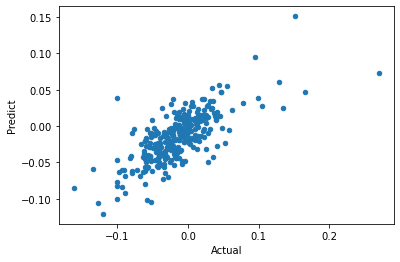

In [126]:
plot_pred_true(y_pred_w_industry, y_train)

In [127]:
(model_w_industry.ssr)

0.2871509419406534

## Regression with Combination features

Add significant features from no-industry regression and industry features

In [128]:
sig_feature_idx_no_industry
# idx 0 is constant added by statsmodel, need to drop the 0 idx and -1 when using on X without adding constant

array([ 0, 17, 22, 23, 30], dtype=int64)

In [129]:
# find index of forwardPE
sig_feature_idx_w_industry

array([18, 21, 29], dtype=int64)

In [130]:
sig_feature_idx = np.array(list(set(sig_feature_idx_no_industry[1:]-1) | set(sig_feature_idx_w_industry)))

In [131]:
q_features = df_factors_X.columns[sig_feature_idx].tolist()
q_features

['priceToSalesTrailing12Months',
 'forwardPE',
 'payoutRatio',
 'debtToEquity',
 'previousClose_logprice']

In [132]:
for cat, f_list in fields.items():
    for f in f_list:
        if f in q_features: print(f'{cat}: {f}')

Momentum: previousClose_logprice
Value: priceToSalesTrailing12Months
Value: forwardPE
Value: payoutRatio
Financial leverage: debtToEquity


In [133]:
comb_idx = np.append(sig_feature_idx, model_idx_industry)

In [146]:
model_comb = sm.OLS(y_train, X_train[:, comb_idx], hasconst=True).fit()
y_pred_comb = model_comb.predict(X_train[:, comb_idx])
print_model_comb = model_comb.summary()
print(print_model_comb)
pkl.dump(model_comb, open(f'./data/model_comb_{load_t}.pkl', 'wb'))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     2.175
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           4.49e-06
Time:                        11:04:40   Log-Likelihood:                 586.55
No. Observations:                 299   AIC:                            -1011.
Df Residuals:                     218   BIC:                            -711.4
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0064      0.003      1.843      0.0

<AxesSubplot:xlabel='Actual', ylabel='Predict'>

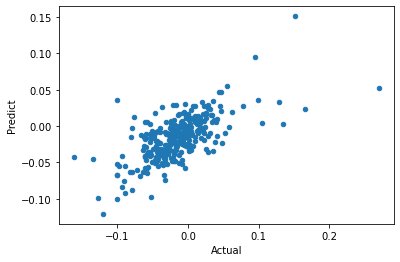

In [135]:
plot_pred_true(y_pred_comb, y_train)

In [136]:
model_comb.ssr

0.34615428212049293

# Clustering

## Cosine Similarity

In [137]:
X = X_train[:, comb_idx]
y = y_train

In [138]:
df_X = df_factors_X.iloc[:, comb_idx]
df_y = df_factors_y
pkl.dump((df_X, df_y), open(f'./data/df_X__df_y_{load_t}.pkl', 'wb'))

In [139]:
# X = df_X.to_numpy().astype(float)
# y = df_y.to_numpy().reshape(-1)

In [140]:
from sklearn.metrics.pairwise import cosine_similarity

In [144]:
cos_sim_matrix = cosine_similarity(X, X)
pkl.dump(cos_sim_matrix, open(f'./data/cos_sim_matrix_{load_t}.pkl', 'wb'))

In [142]:
subject = '601318.SS'
row_index = np.argwhere(df_X.index == subject)[0][0]
# cos_sim_matrix[row_index, :]
cos_res = df_X.index[np.argsort(-cos_sim_matrix[row_index, :])]
cos_res[:10]

Index(['601318.SS', '601229.SS', '600015.SS', '600000.SS', '601166.SS',
       '002493.SZ', '000301.SZ', '601169.SS', '600919.SS', '600016.SS'],
      dtype='object')

In [143]:
df_info_raw.loc['shortName', cos_res[:10]]

601318.SS    PING AN INSURANCE(GROUP)CO.OF C
601229.SS            BANK OF SHANGHAI CO LTD
600015.SS                     HUAXIA BANK CO
600000.SS    SHANGHAI PUDONG DEVELOPMENT BAN
601166.SS             INDUSTRIAL BANK CO LTD
002493.SZ                 RONGSHENG PETRO CH
000301.SZ                 JIANGSU EASTERN SH
601169.SS           BANK OF BEIJING CO. LTD.
600919.SS                    BANK OF JIANGSU
600016.SS        CHINA MINSHENG BANKING CORP
Name: shortName, dtype: object

In [269]:
sorted(-cos_sim_matrix[row_index, :])[:10]

[-0.9999999999999999,
 -0.700572862338634,
 -0.6984428768377665,
 -0.698426685670409,
 -0.6940453770438926,
 -0.6907222074956413,
 -0.6876369672715011,
 -0.6863813061149273,
 -0.6849023950401106,
 -0.6848829332578806]

In [270]:
df_X.loc[['601318.SS', '600115.SS'], :]

,priceToSalesTrailing12Months,forwardPE,payoutRatio,debtToEquity,previousClose_logprice,Advertising Agencies,Aerospace & Defense,Agricultural Inputs,Airlines,Airports & Air Services,...,Specialty Chemicals,Specialty Industrial Machinery,Specialty Retail,Steel,Telecom Services,Textile Manufacturing,Thermal Coal,Tools & Accessories,Utilities—Independent Power Producers,Utilities—Renewable
601318.SS,-0.655508,-0.576570,-0.260555,1.194588,0.141488,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
600115.SS,-0.578637,0.942949,-1.173136,4.129861,-0.568476,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## K-means clustering

In [297]:
from sklearn.cluster import KMeans

In [333]:
n_clusters=8
kmeans = KMeans(n_clusters=n_clusters).fit(X)
kmeans_pred = kmeans.predict(X)

In [334]:
import matplotlib.pyplot as plt

In [335]:
for i in range(min(10,n_clusters)):
    print(i, np.argwhere(kmeans_pred==i).shape)

0 (73, 1)
1 (57, 1)
2 (4, 1)
3 (4, 1)
4 (42, 1)
5 (84, 1)
6 (6, 1)
7 (29, 1)


In [336]:
clus = kmeans.predict(X[np.argwhere(df_X.index == subject)[0][0], :].reshape(1,-1))

In [337]:
df_X.iloc[np.argwhere(kmeans_pred==clus)[:, 0], :].index

Index(['601318.SS', '601166.SS', '600030.SS', '601398.SS', '000001.SZ',
       '601328.SS', '600837.SS', '601288.SS', '600000.SS', '600016.SS',
       '601688.SS', '600919.SS', '601211.SS', '601229.SS', '601169.SS',
       '601988.SS', '601658.SS', '600999.SS', '000776.SZ', '002493.SZ',
       '601818.SS', '000166.SZ', '600958.SS', '601985.SS', '600346.SS',
       '601009.SS', '601377.SS', '600926.SS', '601939.SS', '000876.SZ',
       '600029.SS', '600015.SS', '601066.SS', '600115.SS', '601111.SS',
       '002736.SZ', '601901.SS', '601838.SS', '601916.SS', '000783.SZ',
       '601788.SS', '600109.SS', '000301.SZ', '601108.SS', '600918.SS',
       '000703.SZ', '601990.SS', '600061.SS', '601878.SS', '600606.SS',
       '601162.SS', '601998.SS', '601995.SS', '601933.SS', '601881.SS',
       '002607.SZ', '002157.SZ'],
      dtype='object')

In [338]:
df_info_raw.loc['shortName', df_X.iloc[np.argwhere(kmeans_pred==clus)[:, 0], :].index]

601318.SS    PING AN INSURANCE(GROUP)CO.OF C
601166.SS             INDUSTRIAL BANK CO LTD
600030.SS            CITIC SECURITIES CO LTD
601398.SS    INDUSTRIAL & COMMERCIAL BK OF C
000001.SZ                       PING AN BANK
601328.SS      BANK OF COMMUNICATIONS CO LTD
600837.SS          HAITONG SECURITIES CO.LTD
601288.SS         AGRICULTURAL BANK OF CHINA
600000.SS    SHANGHAI PUDONG DEVELOPMENT BAN
600016.SS        CHINA MINSHENG BANKING CORP
601688.SS           HUATAI SECURITIES CO LTD
600919.SS                    BANK OF JIANGSU
601211.SS     GUOTAI JUNAN SECURITIES CO LTD
601229.SS            BANK OF SHANGHAI CO LTD
601169.SS           BANK OF BEIJING CO. LTD.
601988.SS                  BANK OF CHINA LTD
601658.SS    POSTAL SAVINGS BANK OF CHINA CO
600999.SS    CHINA MERCHANTS SECURITIES CO L
000776.SZ                   GF SECURITIES CO
002493.SZ                 RONGSHENG PETRO CH
601818.SS       CHINA EVERBRIGHT BANK CO LTD
000166.SZ                 SHENWAN HONGYUAN G
600958.SS 

## K means cluster with weighted features

In [321]:
# What if we weigh the features by regression coefficient before clustering?
# https://towardsdatascience.com/improving-clustering-performance-using-feature-weight-learning-d65d4fec77cb

In [323]:
n_clusters=8
kmeans_wf = KMeans(n_clusters=n_clusters).fit(X * model_comb.params) # Weighted by coeff
kmeans_wf_pred = kmeans_wf.predict(X * model_comb.params)

In [324]:
for i in range(min(10, n_clusters)):
    print(i, np.argwhere(kmeans_wf_pred==i).shape)

0 (226, 1)
1 (57, 1)
2 (3, 1)
3 (1, 1)
4 (7, 1)
5 (1, 1)
6 (3, 1)
7 (1, 1)


In [330]:
clus_wf = kmeans_wf.predict((X*model_comb.params)[np.argwhere(df_X.index == subject)[0][0], :].reshape(1,-1))

In [331]:
df_X.iloc[np.argwhere(kmeans_wf_pred==clus_wf)[:, 0], :].index

Index(['300750.SZ', '600036.SS', '601318.SS', '601166.SS', '601012.SS',
       '300059.SZ', '600030.SS', '601888.SS', '002594.SZ', '002475.SZ',
       ...
       '601319.SS', '601881.SS', '688396.SS', '601898.SS', '688009.SS',
       '002607.SZ', '002157.SZ', '601236.SS', '688363.SS', '601698.SS'],
      dtype='object', length=226)

In [332]:
df_info_raw.loc['shortName', df_X.iloc[np.argwhere(kmeans_wf_pred==clus_wf)[:, 0], :].index]

300750.SZ                 CONTEMPORARY AMPER
600036.SS        CHINA MERCHANTS BANK CO LTD
601318.SS    PING AN INSURANCE(GROUP)CO.OF C
601166.SS             INDUSTRIAL BANK CO LTD
601012.SS    LONGI GREEN ENERGY TECHNOLOGY C
                          ...               
002607.SZ                 OFFCN EDUCATION TE
002157.SZ                  JG/ZHENGBANG TECH
601236.SS           HONGTA SECURITIES CO LTD
688363.SS    BLOOMAGE BIOTECHNOLOGY CORPORAT
601698.SS    CHINA SATELLITE COMMUNICATIONS 
Name: shortName, Length: 226, dtype: object

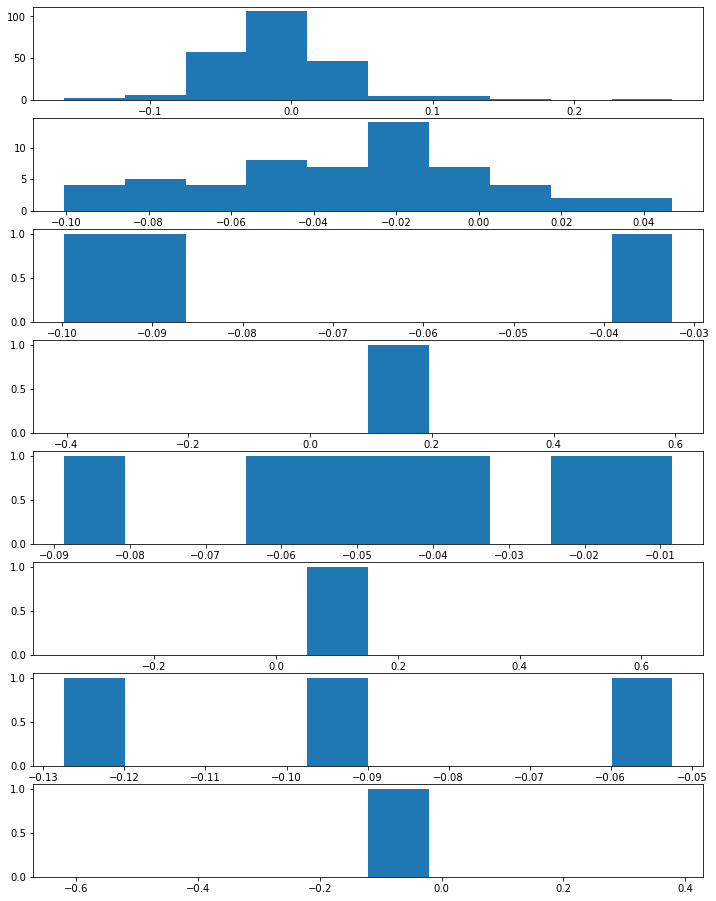

In [329]:
fig, axs = plt.subplots(8,1)
fig.set_size_inches((12,16))

for i in range(8):
    axs[i].hist(y[np.argwhere(kmeans_wf_pred==i)])

## Evaluation of Clusters

In [339]:
from sklearn import metrics

print('Silhouette coef: %0.3f' % metrics.silhouette_score(X * model_comb.params, kmeans.labels_))

Silhouette coef: -0.060


In [342]:
# Search for optimal number of clusters:

n_cluster_range = range(2, 60)
df_cluster_score = pd.DataFrame({'Silhouette':{}, 'DB':{}, 'CH': {}})

from tqdm import tqdm

# Need to do averaging as Kmeans is dependent on random initialization
sil = []
db = []
ch = []

n_iter_kmeans = 10

for n_cluster_search in tqdm(n_cluster_range):
    for it in (range(n_iter_kmeans)):
        X_search = X 
        kmeans = KMeans(n_clusters=n_cluster_search).fit(X_search)
        kmeans_pred = kmeans.predict(X_search)
        
        sil.append(metrics.silhouette_score(X_search, kmeans.labels_))
        db.append(metrics.davies_bouldin_score(X_search, kmeans.labels_))
        ch.append(metrics.calinski_harabasz_score(X_search, kmeans.labels_))        

        df_cluster_score.loc[n_cluster_search, 'Silhouette'] = np.array(sil).mean()
        df_cluster_score.loc[n_cluster_search, 'DB'] = np.array(db).mean()
        df_cluster_score.loc[n_cluster_search, 'CH'] = np.array(ch).mean()

100%|██████████████████████████████████████████████████████████████████████████████████| 58/58 [01:24<00:00,  1.46s/it]


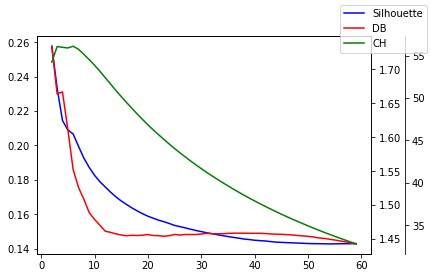

In [343]:
ax1 = df_cluster_score['Silhouette'].plot(color='b') 
# Well-clustered elements:  score near 1.
# Near zero: Close to decision boundary between two neighboring clusters
# Poorly-clustered elements: score near -1 (probably in wrong cluster)


ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1.0))
df_cluster_score['DB'].plot(ax=ax2, color='r')
# Davies-Bouldin score
# *Lower* is better for the Davies-Bouldin score.
# This index signifies the average ‘similarity’ between clusters, where the similarity is 
# a measure that compares the distance between clusters with the size of the clusters themselves.
# Zero is the lowest possible score. Values closer to zero indicate a better partition.

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('axes', 1.1))
df_cluster_score['CH'].plot(ax=ax3, color='g')
# Calinski-Harabasz index (a.k.a. the Variance Ratio Criterion)
# *Higher* is better for the Calinski-Harabasz index: means better-defined clusters.
# The index is the ratio of:
# The mean between-clusters dispersion and
# The inter-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared).
# The score is higher when clusters are dense & well separated.
# Fast to compute.


ax1.get_figure().legend()

In [346]:
df_cluster_score

,Silhouette,DB,CH
2,0.257612,1.734223,54.222666
3,0.233275,1.663998,56.065494
4,0.214492,1.666924,55.975353
5,0.208974,1.611649,55.898609
6,0.206637,1.552356,56.100046
7,0.199488,1.526047,55.745637
8,0.192654,1.508713,55.149596
9,0.187231,1.489049,54.528888
10,0.182634,1.478844,53.871464
11,0.178930,1.470422,53.160674


## DBSCAN

In [348]:
from sklearn.cluster import DBSCAN

In [377]:
dbscan = DBSCAN(eps=1.3, min_samples=3)
dbs_cls = dbscan.fit_predict(X)
dbs_cls

array([ 2,  0,  1, -1,  2,  3,  1, 12, -1, -1,  4, -1, -1, -1, -1, -1, -1,
       -1,  5, -1,  1,  1, -1,  2, -1,  6,  7, -1,  8, -1,  5, 22, -1, -1,
       -1, 18,  9,  4,  8,  0, -1,  5, -1, -1, -1,  0, -1, -1,  1, -1,  2,
        3, -1,  1, -1, 10, 11, -1, 12,  0, 13, -1,  4, 14, -1, 15, -1, 16,
       17, -1, -1, 13, 12,  1,  4, -1, -1, -1, 18, 15, -1,  1,  9,  1, -1,
        9, 15,  5, 23, -1,  1, 19, -1, 17,  4, 18,  6, -1, 17,  1, -1, -1,
       -1, -1, -1, -1, 17, -1,  4, -1, -1, -1, 10, 20,  1, -1, -1, 20, 20,
       24, -1,  7, -1, -1, -1,  4, 16, -1, -1, -1, -1, 13,  8, -1, 23,  5,
       -1, -1,  9, -1, -1,  9,  7, -1, 19, 15, 19,  6, -1, -1, 15, -1,  9,
       14, 15,  1, -1, 21, -1,  4, -1, -1, -1, -1, -1, -1, 10, -1, 15, -1,
       -1,  6, -1, -1,  2, -1, -1, 21,  4, -1, 19, -1, -1,  4, 22, -1, 20,
        3,  1, 13,  8, -1, -1, -1,  9,  1,  7,  8, 16, 20, 11,  4, 11, -1,
       -1, 11,  4, -1, -1,  3, -1,  4, 17, -1, -1, -1,  7, -1,  2, -1,  7,
       -1, -1, -1,  7, -1

In [378]:
val, counts = np.unique(dbs_cls, return_counts=True)
dict(zip(val, counts))

{-1: 156,
 0: 5,
 1: 16,
 2: 6,
 3: 5,
 4: 17,
 5: 5,
 6: 5,
 7: 10,
 8: 5,
 9: 7,
 10: 3,
 11: 5,
 12: 3,
 13: 4,
 14: 3,
 15: 8,
 16: 3,
 17: 6,
 18: 3,
 19: 4,
 20: 8,
 21: 3,
 22: 3,
 23: 3,
 24: 3}

In [352]:
dbs_cls[np.argwhere(df_X.index == '601318.SS')[0][0]]

-1

In [353]:
np.argwhere(dbs_cls==9).reshape(1, -1)[0]

array([], dtype=int64)

In [354]:
df_info_raw.loc['shortName', df_X.index[np.argwhere(dbs_cls==9).reshape(1, -1)[0]]]



Series([], Name: shortName, dtype: object)

# Mean and variance weekly returns

In [158]:
weekly_returns = log_return(df_2y, fri_weekly=True)
if datetime.datetime.weekday(weekly_returns.index[-1]) == 4: 
    pass
else: 
    weekly_returns = weekly_returns.drop(weekly_returns.index[-1], axis=0)

return_weekly_mean = weekly_returns.mean(axis=0)

In [159]:
vol_annual = weekly_returns.std(axis=0) * np.sqrt(52)
vol_annual

000001.SZ    0.367635
000002.SZ    0.305989
000063.SZ    0.337598
000066.SZ    0.444205
000069.SZ    0.374028
               ...   
688363.SS    0.493292
688396.SS    0.553255
688561.SS    0.411547
688599.SS    0.570076
688981.SS    0.370871
Length: 300, dtype: float64

In [160]:
mean_var = pd.concat((return_weekly_mean.rename('mean_return'), vol_annual.rename('ann_vol')), axis=1, ignore_index=False)

<AxesSubplot:xlabel='ann_vol', ylabel='mean_return'>

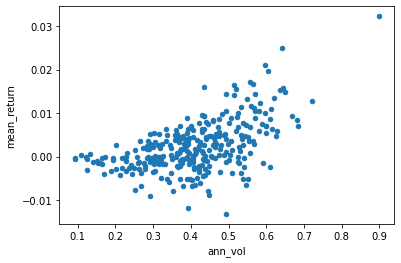

In [161]:
mean_var.plot.scatter(x='ann_vol', y='mean_return')

In [162]:
pkl.dump(mean_var, open('./data/mean_var_{}.pkl'.format(str(t)[:10]), 'wb'))
print(str(t)[:10])

2022-03-18
